SAYAN SARKAR - SALES PREDICTION

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [53]:
df1=pd.read_csv("F:\\PYTHON AIML\\Advertising.csv")
df1.head(10)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [54]:
df1.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Index      200 non-null    int64  
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [55]:
df1.head()

,Index,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [56]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Index,200.0,100.5000,57.879185,1.0,50.750,100.50,150.250,200.0
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [57]:
df1.isnull().sum()

Index        0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

SEABORN PLOTS 

<Axes: xlabel='TV', ylabel='Sales'>

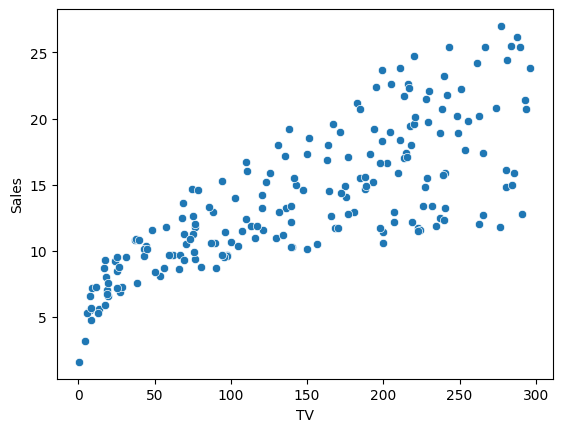

In [58]:
sns.scatterplot(x="TV",y="Sales",data=df1)


c:\Users\Sayan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\Sayan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\Sayan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


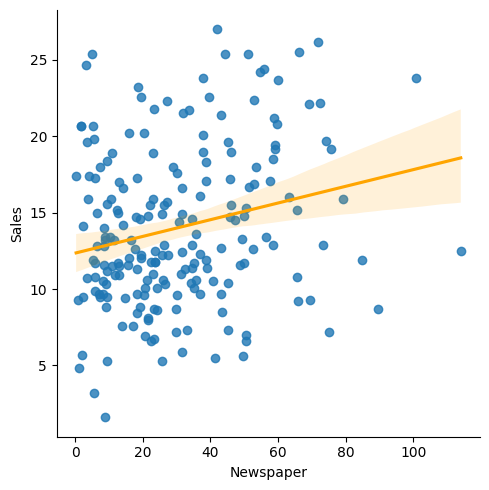

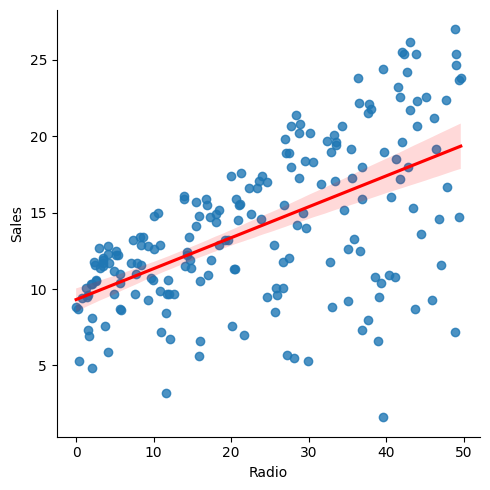

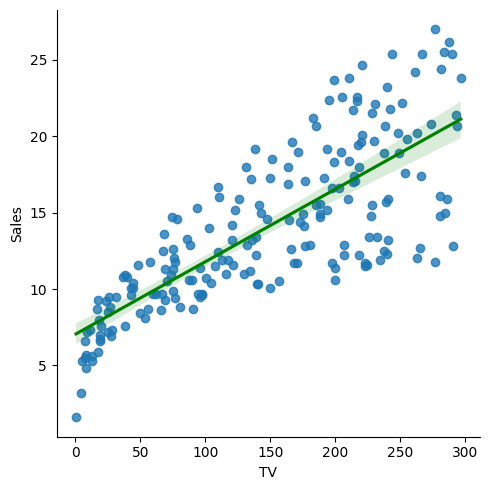

In [59]:
sns.lmplot( x="Newspaper", y="Sales",data=df1,line_kws={'color': 'orange'})
sns.lmplot( x="Radio", y="Sales",data=df1,line_kws={'color': 'red'})
sns.lmplot( x="TV", y="Sales",data=df1,line_kws={'color': 'green'})

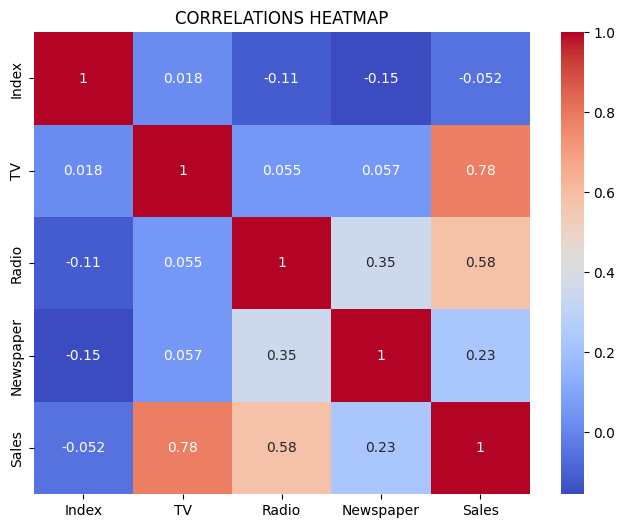

In [60]:
#Displaying the Heatmap
plt.figure(figsize=(8,6))
corr=df1.corr()
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.title("CORRELATIONS HEATMAP")
plt.show()

Splitting Data into Train and Test sets

In [61]:
df2=df1.drop(['Index'],axis=1)
data=df2.values
x=data[:,0:3]
y=data[:,3]

In [62]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=72)

In [63]:
len(y_test)

50

Linear Regression Model

In [64]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()
lin_model.fit(x_train,y_train)

LinearRegression()

In [65]:
lin_model.score(x_test,y_test)*100

90.83391029437634

In [66]:
# Coefficients and Intercept
X = df2[['TV', 'Radio', 'Newspaper']]
coefficients = lin_model.coef_
intercept = lin_model.intercept_
print("coefficients : ")
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept : {intercept:.4f}")

coefficients : 
TV: 0.0461
Radio: 0.1836
Newspaper: -0.0046
Intercept : 3.2047


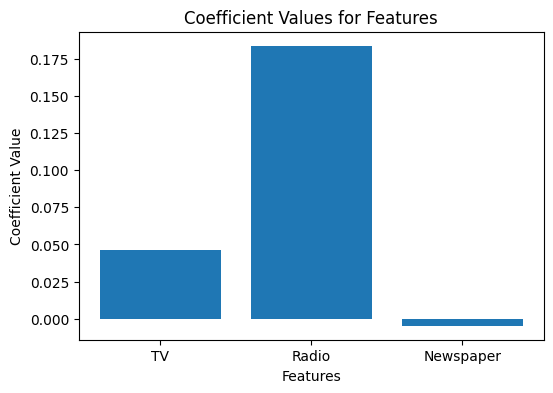

In [67]:
# Coefficient Visualization
plt.figure(figsize=(6, 4))
plt.bar(X.columns, coefficients)
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.title("Coefficient Values for Features")
plt.show()

In [77]:
#Calculating mse, rmse and r2 Score
from sklearn.metrics import mean_squared_error,r2_score
predict=lin_model.predict(x_test)
mse=mean_squared_error(y_test,predict)
rmse=np.sqrt(mse)
r2=r2_score(y_test,predict)

print(f"Mean Squared Error: {mse:.3f}")
print(f"Root Mean Squared Error: {rmse:.3f}")
print(f"R-squared: {r2:.3f}")

Mean Squared Error: 2.549
Root Mean Squared Error: 1.597
R-squared: 0.908


The model's relatively accurate predictions are indicated by the lower MSE and RMSE values.
The R2 value of close to 1 indicates that the model is explaining a significant portion of the variability in the Sales data, which implies a good fit.

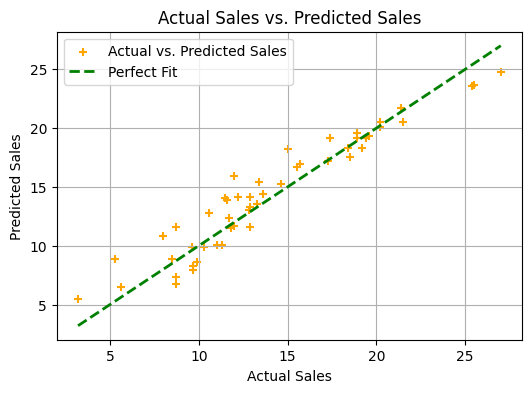

In [91]:
# Visualize the model's predictions
plt.figure(figsize=(6, 4))
plt.scatter(y_test, predict, c='orange', marker='+', alpha=0.99, label='Actual vs. Predicted Sales')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='dashed', color='green', linewidth=2, label='Perfect Fit')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual Sales vs. Predicted Sales")
plt.legend()
plt.grid(True)
plt.show()

Testing on Sample values

In [73]:
test_df = pd.DataFrame({'TV': [100, 250, 200],'Radio': [30, 20, 10],'Newspaper': [20, 25, 35]})
test_df

,TV,Radio,Newspaper
0,100,30,20
1,250,20,25
2,200,10,35


In [74]:
lin_model.predict(test_df)


c:\Users\Sayan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([13.23425877, 18.29610343, 14.1071938 ])